<h2><center>Определение закономерностей, определяющих успешность компьютерных игр</center></h2>

## Оглавление
* [Описание проекта](#first-bullet)
* [Описание данных](#second-bullet)
* [Шаг 1. Предобработка данных](#third-bullet)
* [Шаг 2. Анализ данных](#fourth-bullet)
* [Шаг 3. Составим портрет пользователя каждого региона](#fifth-bullet)
* [Шаг 4. Проверка гипотез](#sixth-bullet)
* [Общий вывод по работе](#seventh-bullet)

## Описание проекта <a class="anchor" id="first-bullet"></a>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных <a class="anchor" id="second-bullet"></a>

- `Name` — название игры

- `Platform` — платформа

- `Year_of_Release` — год выпуска

- `Genre` — жанр игры

- `NA_sales` — продажи в Северной Америке (миллионы долларов)

- `EU_sales` — продажи в Европе (миллионы долларов)

- `JP_sales` — продажи в Японии (миллионы долларов)

- `Other_sales` — продажи в других странах (миллионы долларов)

- `Critic_Score` — оценка критиков (максимум 100)

- `User_Score` — оценка пользователей (максимум 10)

- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг 1. Предобработка данных <a class="anchor" id="third-bullet"></a>

Импортируем все библиотеки, которые понадобятся для работы:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Посмотрим на данные:

In [2]:
games = pd.read_csv('games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


При беглом взгляде на данные видно, что:

- нужно привести все колонки к нижнему регистру.

- во многих колонках есть пропуски: name, year_of_release, genre, critic_score, user_score, rating.

- в нескольких столбцах необходимо заменить тип данных, как например: year_of_release сейчас типа float64, но тк это год, то здесь не нужно дробное число - лучше подойдет тип int; user_score - сейчас object, а должен быть float64 (тк это оценка пользователей (максимум 10)).

#### Приведем все колонки к нижнему регистру

In [4]:
games.columns = games.columns.str.lower() 
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Преобразование типов данных

Преобразуем тип данных в стобцах year_of_release и user_score.

In [5]:
games['year_of_release'] = games['year_of_release'].astype('Int64', errors = 'ignore')

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Отлично, в year_of_release тип поменяли, теперь посмотрим поближе на user_score.

In [7]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Здесь все выглядит нормально, кроме странного значения tbd, что скорее всего значит что-то вроде to be defined / to be determined, то есть эти значения на момент сохранения данных - еще не определены. А тк они не определены, то заменять их каким-то значением будет не честно, я бы заменила они на nan, тк по сути для нас сейчас это одно и то же.

In [8]:
games.loc[games['user_score'] == 'tbd']['user_score'].count()


2424

Таких значений 2424, что составляет около 15% всей выборки. Заменим их на nan.

In [9]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [10]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Теперь заменим тип данных на float64.

In [11]:
games['user_score'] = games['user_score'].astype('float64', errors = 'ignore')

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


#### Посмотрим поближе на пропуски в данных

Как уже было написано выше, пропуски есть в следущих столбцах: name, year_of_release, genre, critic_score, user_score, rating.

Столбец name:

In [13]:
games['name'].isnull().sum()

2

В этой колонке всего 2 пропуска, но тк это самый важный критерий - название игры, то думаю будет логичным просто удалить эти две строки (это очень маленький процент всех данных и их невозможно восстановить).

In [14]:
games = games.loc[~games['name'].isna()]

In [15]:
games['name'].isnull().sum()

0

Столбец year_of_release:

In [16]:
games['year_of_release'].isnull().sum()

269

In [17]:
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [18]:
games.loc[games['year_of_release'].isnull()].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Не вижу адекватного способа восстановить года выпуска по остальным значения, кроме как разве что в части из них год можно восстановить из названия игры - но это будет долго, а тк это всего 269/16713 значений (что составляет меньше 2%), то предпочту удалить эти строки (тк сравнивать игры без года выпуска довольно сложно - технологии быстро меняются и игры быстро устаревают).

In [19]:
games = games.loc[~games['year_of_release'].isna()]

In [20]:
games['year_of_release'].isnull().sum()

0

Столбец genre:

In [21]:
games['genre'].isnull().sum()

0

Видимо мы удалили пропущенные значения в столбце genre, когда удаляли строки в столбце name и year_of_release.

Столбецы critic_score, user_score, rating:

In [22]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [23]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [24]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Во всех этих трех стобцах пропусков больше половины, поэтому удалять данные - не вариант. Но в то же время пытаться найти средние/медианные значения также кажется плохой идеей - это же рейтинг, он слишком много от чего зависит, такое решение только испортит данные. Предполагаю, что пропуски здесь потому, что часть игр не оценивалась пользователями (например, сайт, с которого были взяты данные, начал существовать позже какого-то года, и устаревшие игры особо никто не оценивает).

Поэтому предполагаю, что здесь будет честно оставить данные как есть - то есть не заменять пропущенные значения.

#### Посчитаем суммарные продажи игр во всех регионах

У нас есть данные о продажах отдельно в Северной Америке, в Европе, в Японии и в других странах. Это помогает смотреть на продаваемость игр в различных частях мира, но также было бы полезно иметь данные о общих продажах игры во всем мире.

Заведем отдельный столбец total_sales и посчитаем в нем сумму продаж игр во всех известных нам странах вместе (все числа в миллионнах долларов).

NA_sales — продажи в Северной Америке (миллионы долларов)

EU_sales — продажи в Европе (миллионы долларов)

JP_sales — продажи в Японии (миллионы долларов)

Other_sales — продажи в других странах (миллионы долларов)

In [25]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

В этом шаге мы ознакомились с данными и подготовили их для дальнейшего анализа:

- Все колонки были приведены к нижнему регистру.

- Была произведена работа с пропусками, от части таких данных было решено избавиться (пропуски в колонках: name, year_of_release), а часть было решено оставить как есть (колонки с пропусками: critic_score, user_score, rating).

- Значения tbd в столбце user_score были заменены на nan.

- В столбцах year_of_release и user_score был заменен тип данных.

## Шаг 2. Анализ данных <a class="anchor" id=" forth-bullet"></a>

### 2.1 Посмотрим сколько игр выпускалось в разные годы


In [26]:
games.groupby(['year_of_release'])['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

<AxesSubplot:xlabel='year_of_release'>

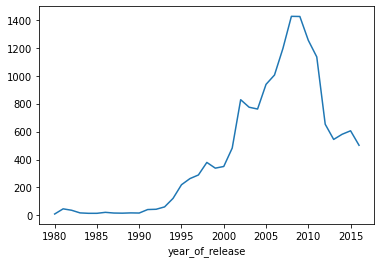

In [27]:
games.groupby(['year_of_release'])['name'].count().plot()

Тк главная цель этой работы - выявить определяющие успешность игры закономерности (это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании), то не имеет смысла смотреть на игры 35-летней давности. Какие-то из них безусловно тоже были популярны, но за это время критерии скорее всего сильно поменялись.

А еще в 1980 - 1993 годы игр выпускалось меньше 100 в год, и это не честно сравнивать года, если в каждом из них такие разные по кол-ву выборки.

Поэтому я предлагаю удалить все данные до 1994 года - так мы сократим вмеменной промежуток практически вдвое и ког-во игр в год там уже выпускается приличное - как минимум 121 огра в год.

Посмотрим сколько мы хотим удалить данных:

In [28]:
games.loc[games['year_of_release'] <= 1993]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,20.62
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...
14610,Doom,PC,1992,Shooter,0.02,0.00,0.00,0.00,85.0,8.2,M,0.02
14621,SimCity,PC,1988,Simulation,0.00,0.02,0.00,0.01,64.0,2.2,E10+,0.03
15692,Empire Deluxe,PC,1992,Strategy,0.02,0.00,0.00,0.00,NaN,NaN,NaN,0.02
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02


365 / 16700 = около 2% всех данных, поэтому можем смело удалить их.

In [29]:
games = games.loc[games['year_of_release'] > 1993]

### 2.2 Посмотрим, как менялись продажи по платформам. 

Выберим платформы с наибольшими суммарными продажами и построим распределение по годам.

Посмотрим за какой характерный срок появляются новые и исчезают старые платформы.

In [30]:
games['platform'].unique()

array(['Wii', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS',
       'N64', 'PS', 'SNES', 'XB', 'PC', 'PSP', 'XOne', 'WiiU', 'GC', 'DC',
       'PSV', 'SAT', 'GEN', 'WS', 'NG', 'SCD', 'TG16', 'NES', '3DO',
       'PCFX'], dtype=object)

In [31]:
games.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

Наибольшие суммарные продажи выделяются у первых 6 платформ - PS2, X360, PS3, Wii, DS, PS.

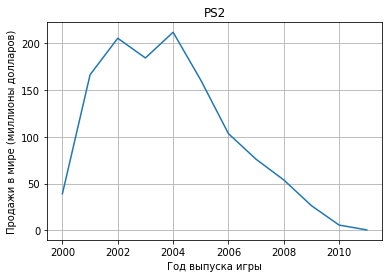

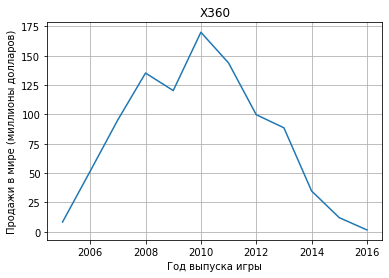

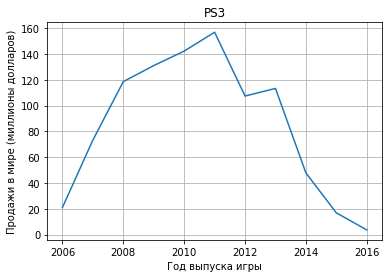

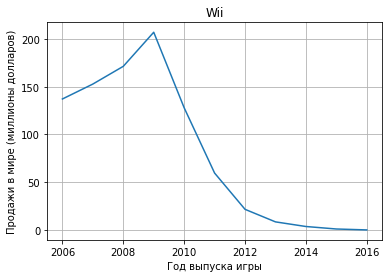

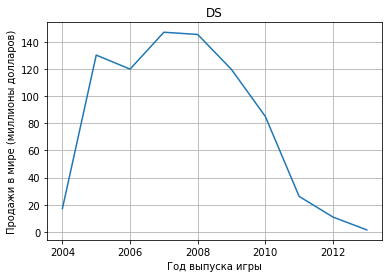

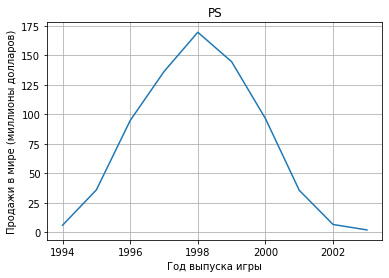

In [32]:
top_sales_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

for top_platform in top_sales_platforms:
    games.query('platform == @top_platform').groupby('year_of_release')['total_sales'].sum().plot(grid=True)
    plt.xlabel('Год выпуска игры')
    plt.ylabel('Продажи в мире (миллионы долларов)')
    plt.title(top_platform)
    plt.show()

Из графиков видно, что обычно платформам нужно 1-2 года, чтобы набрать популярность и что средний цикл их жизни около 10 лет (примерно к середине этого срока - то есть лет через 5 - на рынке появляется что-то другое и начинает отвоевывать у первой платформы популярность).

Добавим график по всем платформам и всем годам, начиная с 1993:

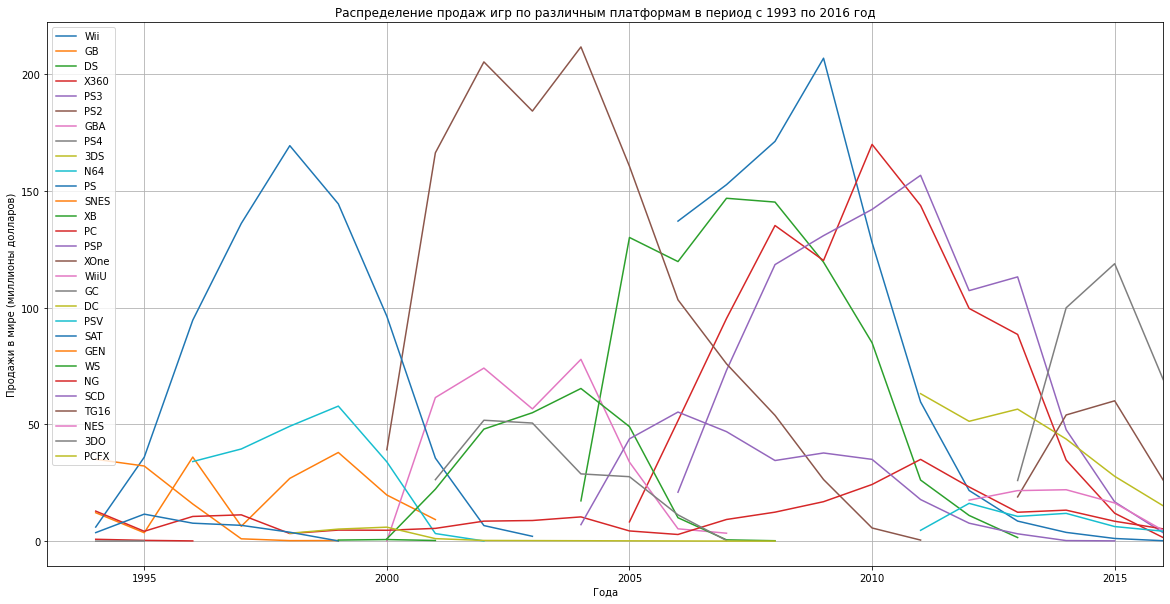

In [33]:
platforms_after_1993 = games.query('year_of_release>=1993 and year_of_release<=2016')['platform'].unique()

for curr_platform in platforms_after_1993:
    (
    games.query('platform == @curr_platform'). 
    groupby('year_of_release')['total_sales'].
    sum().
    plot(grid=True, figsize = (20,10))
    )
plt.xlim(1993, 2016)
plt.xlabel('Года')
plt.ylabel('Продажи в мире (миллионы долларов)')
plt.title('Распределение продаж игр по различным платформам в период с 1993 по 2016 год')
plt.legend(platforms_after_1993)
plt.show()

### 2.3 Возьмем данные за соответствующий актуальный период.

Посмотрим на то какие платформы лидируют по продажам, растут они или падают, и выберем несколько потенциально прибыльных платформ.

Для получения прогнозов на 2017 год нам не актуально брать период, в который еще даже не появились популярные в последние несколько лет платформы, и судя по графику выше - нужно брать период приблизительно с 2011-2013 года - там начинают жить новые платформы, у которых жизненный цикл только начинается (они могут взлететь, а могут нет), а также там находятся на пике несколько популярных платформ, которые постепенно начинают терять свою популярность и к 2016 уже скорее всего почти не пользуются спросом - но по ним как раз можно сделать актуальные выводы о том, что уже не является критерием успеха на рынке.
Поэтому изменим актуальный период на "с 2013 по 2016 год".

In [34]:
games['platform'].unique()

array(['Wii', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS',
       'N64', 'PS', 'SNES', 'XB', 'PC', 'PSP', 'XOne', 'WiiU', 'GC', 'DC',
       'PSV', 'SAT', 'GEN', 'WS', 'NG', 'SCD', 'TG16', 'NES', '3DO',
       'PCFX'], dtype=object)

In [35]:
games.query('year_of_release>=2013 and year_of_release<=2016')['platform'].unique()


array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

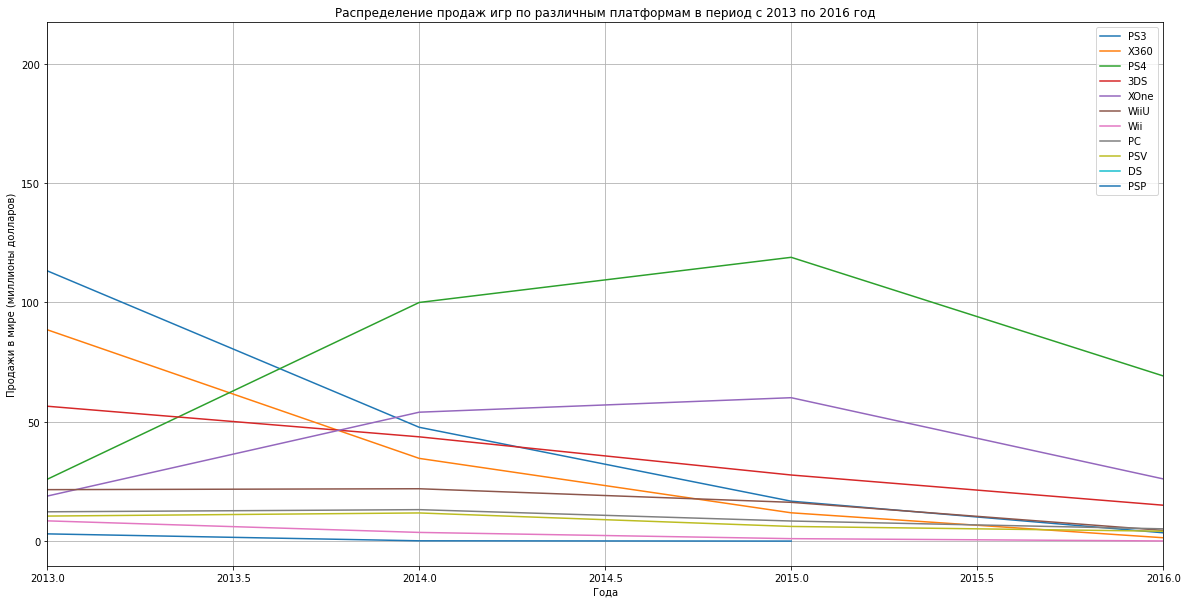

In [36]:
platforms = games.query('year_of_release>=2013 and year_of_release<=2016')['platform'].unique()

for current_platform in platforms:
    (
    games.query('platform == @current_platform'). 
    groupby('year_of_release')['total_sales'].
    sum().
    plot(grid=True, figsize = (20,10))
    )
plt.xlim(2013, 2016)
plt.xlabel('Года')
plt.ylabel('Продажи в мире (миллионы долларов)')
plt.title('Распределение продаж игр по различным платформам в период с 2013 по 2016 год')
plt.legend(platforms)
plt.show()

Из графиков видно, что практически все платформы следуют примерно одинаковому циклу: появляются на рынке, затем набирают популярность в течение примерно 2-ух лет, затем уже не так стремительно продолжают набирать популярность и достигают своего пика, достигнув который - начинают довольно заметно терять популярность (по видимости потому, что за это время на рынке появляются их прямые конкуренты с более привлекательными для пользователей параметрами). Весь жизненный цикл занимает приблизительно 8-10 лет.

И тк задача у нас - выделить потенциально прибыльные платформы, то из графика видно, что к 2014-2015 году практически все платформы, которые мы рассматриваем, уже подходят к логическому концу их жизненного цикла, кроме двух платформ - PS4 и XOne (есть также те, которые появились незадолго до появления этих двух, но они так и не набрали высокой популярности и судя по графикам уже тоже уходят на спад). Обе платформы начали существование в 2013 году, и , учитывая то, что за 2016 год данные у нас могут быть не полные (что оправдывает провал в графике, не смотря на подъем в 2014 и в 2015 году), могут быть потенциально прибыльными еще приблизительно года 3-4 (если смотреть на развитие остальных платформ), после чего они также начнут постепенно снижать свою попунярность. То есть на 2017-2019 годы можно рассчитывать на их потенциальную прибыльность.

Также, не смотря на то, что PS3 закономерно заканчивает свой жизненный цикл, в 2015 году суммарная прибыль с продаж игр для этой платформы все еще держится на 25 млн (а данные за 2016 у нас не полные), то есть я бы рассчитывала на ее потенциальную прибыльность еще 1-2 года.

### 2.4 Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.

Посмотрим велика ли разница в продажах и в средних продажах на разных платформах.

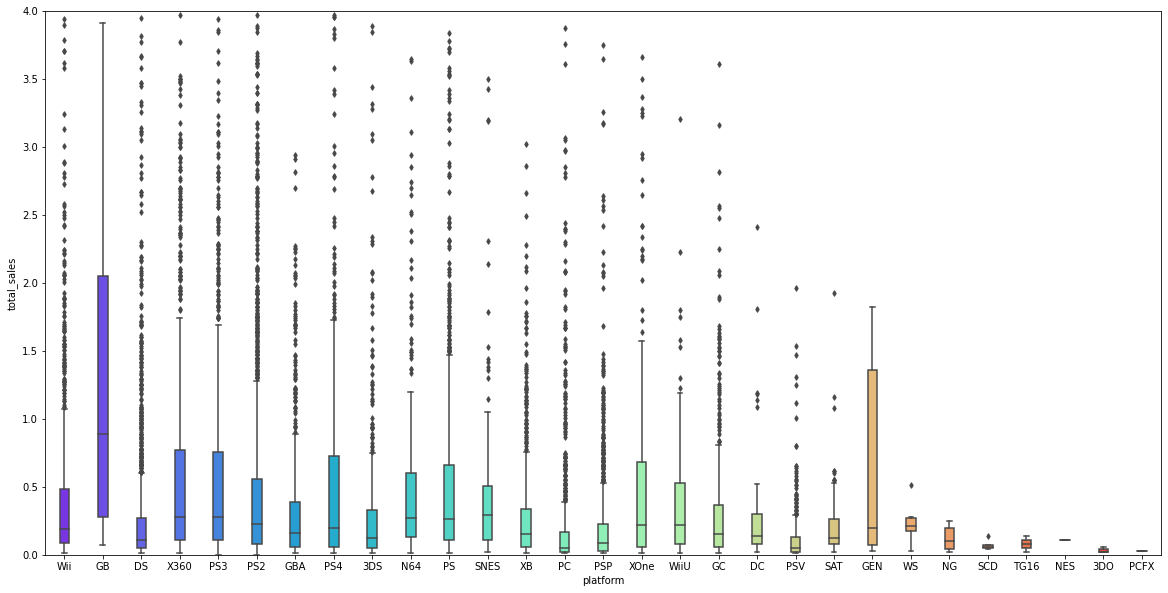

In [37]:
games_in_period = games.loc[(games['year_of_release'] >= 2013) & (games['year_of_release'] <= 2016)]


plt.figure(figsize=(20,10))
platforms_boxplot = sns.boxplot(x = 'platform',
                                y = 'total_sales',
                                palette = 'rainbow',
                                data = games,
                                fliersize = 4,
                                width = 0.25)
plt.ylim(0,4)
plt.show()

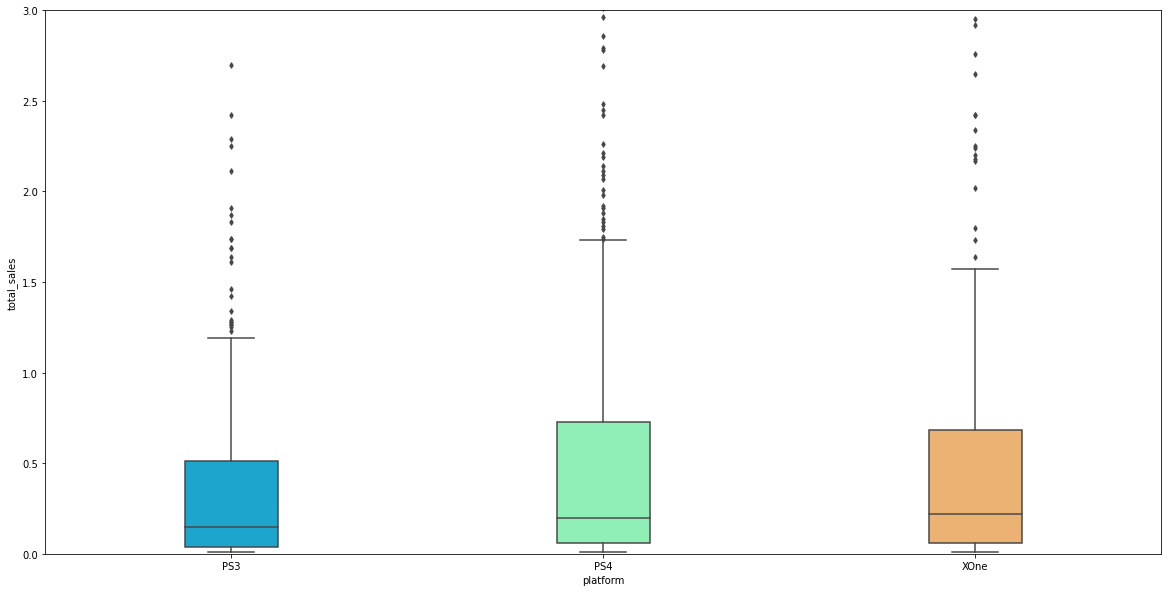

In [38]:
potentially_profitable_platforms = games_in_period.loc[(games['platform'] == 'PS4') | (games['platform'] == 'XOne') | (games['platform'] == 'PS3') ]

plt.figure(figsize=(20,10))
platforms_boxplot = sns.boxplot(x = 'platform',
                                y = 'total_sales',
                                palette = 'rainbow',
                                data = potentially_profitable_platforms,
                                fliersize = 4,
                                width = 0.25)
plt.ylim(0,3)
plt.show()

По графикам видно, что разница (разброс) в продажах игр по каждой платформе сильно зависит от платформы - на некоторых платформах этот разброс огромен, как например на GB (от 0.25 до 2.25 млн), а на некоторых платформах,как например у WS и NES, он совсем небольшой. 

Также видно, что медиана по продаж на разных платформах тоже довольно сильно разная - от 0.1 до 0.8 млн.

А если посмотреть на разброс в продажах игр и медианному показателю по трем выбранным нами ранее платформам - то они довольно похожи, но конечно PS3 уже немного отстает. Медиана находится примерно в 0.2 млн, а большинство показателей выручки за игру не превышают 1.75 млн.

### 2.5 Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

#### Корреляция между отзывами пользователей и продажами

Для платформы PS4:

In [39]:
games_in_period.loc[games_in_period['platform'] == 'PS4']['total_sales'].corr(games_in_period.loc[games_in_period['platform'] == 'PS4']['user_score'])

-0.031957110204556424

Для платформы XOne:

In [40]:
games_in_period.loc[games_in_period['platform'] == 'XOne']['total_sales'].corr(games_in_period.loc[games_in_period['platform'] == 'XOne']['user_score'])

-0.06892505328279412

Для платформы PS3:

In [41]:
games_in_period.loc[games_in_period['platform'] == 'PS3']['total_sales'].corr(games_in_period.loc[games_in_period['platform'] == 'PS3']['user_score'])

0.0023944027357566925

#### Корреляция между отзывами пользователей и продажами вне зависимости от платформы

In [42]:
games_in_period['total_sales'].corr(games_in_period['user_score'])

-0.0026078133545982727

#### Корреляция между отзывами критиков и продажами

Для платформы PS4:

In [43]:
games_in_period.loc[games_in_period['platform'] == 'PS4']['total_sales'].corr(games_in_period.loc[games_in_period['platform'] == 'PS4']['critic_score'])

0.406567902061781

Для платформы XOne:

In [44]:
games_in_period.loc[games_in_period['platform'] == 'XOne']['total_sales'].corr(games_in_period.loc[games_in_period['platform'] == 'XOne']['critic_score'])

0.41699832800840175

Для платформы PS3:

In [45]:
games_in_period.loc[games_in_period['platform'] == 'X360']['total_sales'].corr(games_in_period.loc[games_in_period['platform'] == 'X360']['critic_score'])

0.3503445460228664

Корреляция между отзывами критиков и продажами вне зависимости от платформы:

In [46]:
games_in_period['total_sales'].corr(games_in_period['critic_score'])

0.3136995151027369

#### Построим диаграммы рассеяния для продаж / отзывов критиков.

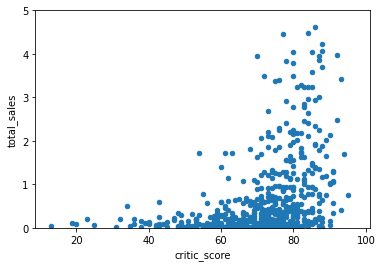

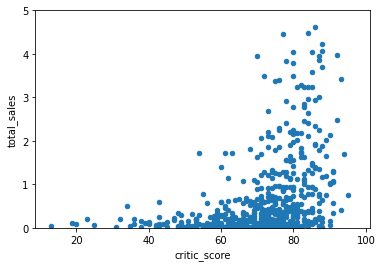

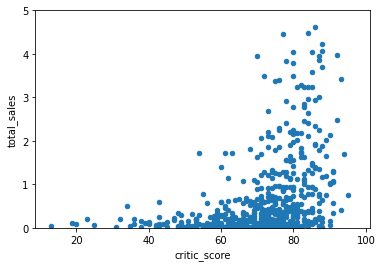

In [47]:
popular_platforms = ['PS4', 'XOne', 'PS3']


for platform in popular_platforms:
    (
    games_in_period.query('platform == @popular_platforms'). 
    plot.scatter(x = 'critic_score', y = 'total_sales')
    )
    plt.ylim(0,5)
plt.show()

#### Построим диаграммы рассеяния для продаж / отзывов пользователей.

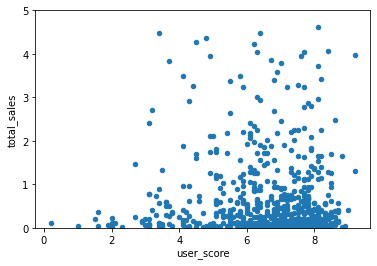

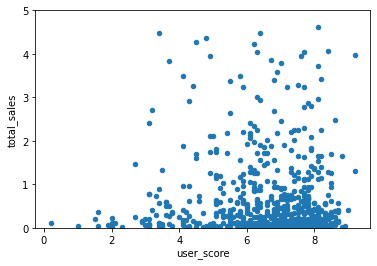

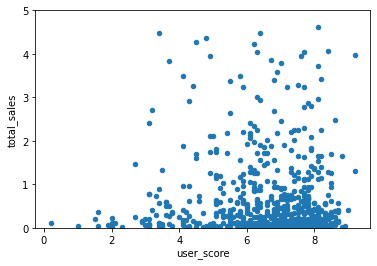

In [48]:
popular_platforms = ['PS4', 'XOne', 'PS3']


for platform in popular_platforms:
    (
    games_in_period.query('platform == @popular_platforms'). 
    plot.scatter(x = 'user_score', y = 'total_sales')
    )
    plt.ylim(0,5)
plt.show()

Из диаграмм и чистых цифр корреляции видно, что зависимости между продажами и отзывами пользователей почти нет или она отрицательная. А вот зависимость между продажами и отзывами критиков довольно сильная и стабильная (корреляция около 0.4 для полпулярных платформ и около 0.3 для всех платформ).

### 2.6 Посмотрм на общее распределение игр по жанрам

Выделим самые прибыльных жанрах, жанры с высокими и низкими продажами.

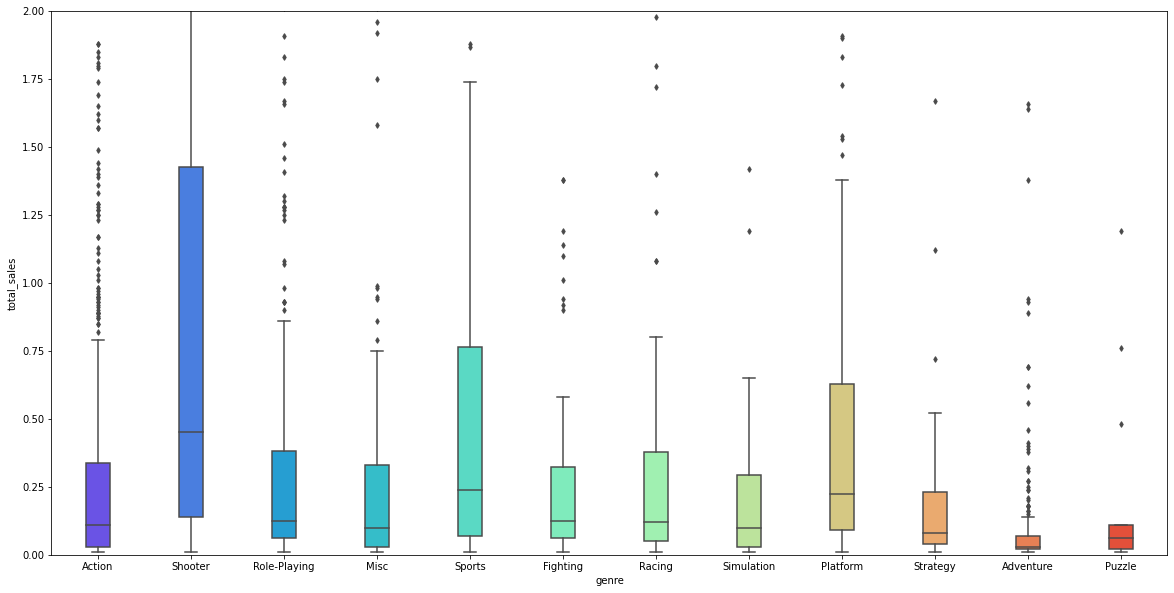

In [49]:
plt.figure(figsize=(20,10))
platforms_boxplot = sns.boxplot(x = 'genre',
                                y = 'total_sales',
                                palette = 'rainbow',
                                data = games_in_period,
                                fliersize = 4,
                                width = 0.25)
plt.ylim(0,2)
plt.show()

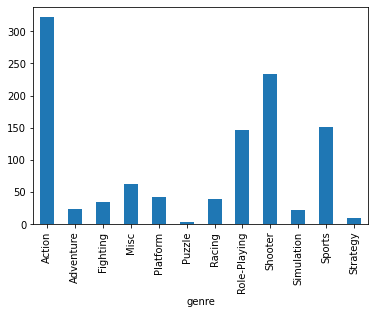

In [50]:
genres_popularity = games_in_period.groupby(['genre'])['total_sales'].sum().plot(kind = 'bar')

Из распределения видно, что самые прибыльные жанры - Platform, Shooter, чуть за ними Fighting, Sports, Racing, Role-Playing еще менее прибыльные Simulation  и Action, Misc, и наименее прибыльные Adventure, Strategy, Puzzle.

Наименее прибыльный жанр Adventure имеет медиану примерно в 0.05 млн продаж, а самый прибыльный жанр Shooter имеет медиану в 0.2 млн, Но при этом разброс прибыли у Adventure с 0.05 млн до 0.3 млн (здесь лежат 99% значений), а у жанра Shooter разброс от 0.01 до 1.8 млн, то есть игры в этом жанре могут принести гораздо большую прибыль.

По суммарным продажам резко выделяется жанр Action, за ним идет Shooter, Role-Playing и Sports. Эти 4 жанра сильно выделяются на общем фоне остальных жанров, которые коллеблются между 10-75 мл долларов по суммарным продажам. Самыми не прибыльными являются жанры Puzzle и Strategy.

### Вывод

В этом шаге было рассмотрено:

- Сколько игр выпускалось в разные годы и были отсечены года, не релевантные для дальнейшего анализа (до 1994 года).
- Как менялись продажи по платформам. Были выбраны платформы с наибольшими суммарными продажами (PS2, X360, PS3, Wii, DS, PS) и построены распределения их прибыльности по годам. Был сделан вывод, что обычно платформам нужно 1-2 года, чтобы набрать популярность и что средний цикл их жизни около 8-10 лет (примерно к середине этого срока - то есть лет через 5 - на рынке появляется что-то другое и начинает отвоевывать у первой платформы популярность).
- Был выделен актуальный период рассмотрения данных, на основе которого можно будет сделать прогноз на 2017 год (это период с 2013 по 2016 год). К 2014-2015 году практически все платформы, которые мы рассматриваем в данном периоде, уже подходят к логическому концу их жизненного цикла, кроме трех платформ - PS3 (в наименьшей степени), PS4 и XOne, и в 2017-2019 годы можно рассчитывать на их потенциальную прибыльность.
- Было построено распределение по глобальным продажам каждой игры и разбивкой по платформам. По графикам видно, что разница (разброс) в продажах игр по каждой платформе сильно зависит от платформы - на некоторых платформах этот разброс огромен, как например на GB (от 0.25 до 2.25 млн), а на некоторых платформах,как например у WS и NES, он совсем небольшой. Также видно, что медиана по продаж на разных платформах тоже довольно сильно разная - от 0.1 до 0.8 млн.
- Для трех популярных платформ были посчитаны корелляции между прибылью и рейтингами пользователей, и между прибылью и рейтингами критиков, также для этих параметров были построены диаграммы рассеяния, и был сделан вывод, что что ависимость между продажами и отзывами критиков есть и довольно сильная (корреляция около 0.4 по трем рассматриваемым платформам и 0.3 по всем остальным). 
- Было рассмотренно общее распределение игр по жанрам. По суммарным продажам резко выделяется жанр Action, за ним идет Shooter, Role-Playing и Sports. Эти 4 жанра сильно выделяются на общем фоне остальных жанров, которые коллеблются между 10-75 мл долларов по суммарным продажам. Самыми не прибыльными являются жанры Puzzle и Strategy.

## Шаг 3. Составим портрет пользователя каждого региона <a class="anchor" id="fifth-bullet"></a>

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы.
- Самые популярные жанры.
- Выясним влияет ли рейтинг ESRB на продажи в отдельном регионе.

### 3.1 Выделим самые популярные платформы (топ-5) в интересующем нас периоде

#### Для Северной Америки:

In [51]:
top_na_platforms = games_in_period.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False).head(5)
top_na_platforms

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

In [52]:
top_na_platforms.loc['Others'] = games_in_period['na_sales'].sum() - sum(top_na_platforms)
top_na_platforms

platform
PS4       108.74
XOne       93.12
X360       81.66
PS3        63.50
3DS        38.20
Others     52.49
Name: na_sales, dtype: float64

<AxesSubplot:ylabel='na_sales'>

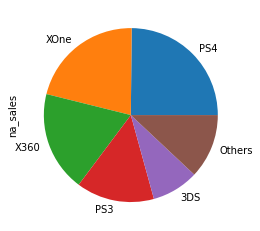

In [53]:
top_na_platforms.plot.pie()

#### Теперь сделаем тоже самое для Европы:

In [54]:
top_eu_platforms = games_in_period.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False).head(5)
top_eu_platforms

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

In [55]:
top_eu_platforms.loc['Others'] = games_in_period['eu_sales'].sum() - sum(top_eu_platforms)
top_eu_platforms

platform
PS4       141.09
PS3        67.81
XOne       51.59
X360       42.52
3DS        30.96
Others     58.26
Name: eu_sales, dtype: float64

<AxesSubplot:ylabel='eu_sales'>

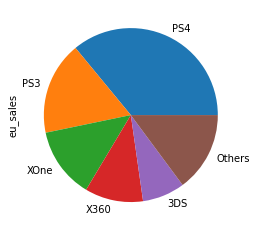

In [56]:
top_eu_platforms.plot.pie()

#### И такие же данные найдем для Японии:

In [57]:
top_jp_platforms = games_in_period.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False).head(5)
top_jp_platforms

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

In [58]:
top_jp_platforms.loc['Others'] = games_in_period['jp_sales'].sum() - sum(top_jp_platforms)
top_jp_platforms

platform
3DS       67.81
PS3       23.35
PSV       18.59
PS4       15.96
WiiU      10.88
Others     4.19
Name: jp_sales, dtype: float64

<AxesSubplot:ylabel='jp_sales'>

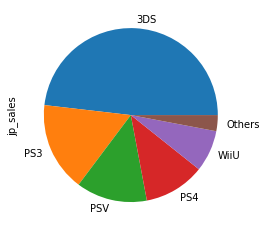

In [59]:
top_jp_platforms.plot.pie()

Если посмотреть на доли продаж по конкретным платформам, то видно, что во всех трех странах среди лидеров выделяюется PS3 и PS4 и 3DS, также в Северной Америке и Европе на лидирующих местах XOne и X360, а в Японии популярными также являются PSV и WiiU, которых нет в топе Северной Америки и Европы.

### 3.2 Выделим самые популярные жанры (топ-5) в интересующем нас периоде

#### Для Северной Америки:

In [60]:
top_na_genres = games_in_period.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False).head(5)
top_na_genres

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [61]:
top_na_genres.loc['Others'] = games_in_period['na_sales'].sum() - sum(top_na_genres)
top_na_genres

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Others           62.76
Name: na_sales, dtype: float64

<AxesSubplot:ylabel='na_sales'>

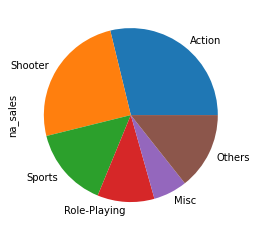

In [62]:
top_na_genres.plot.pie()

#### Тоже самое сделаем для Европы:

In [63]:
top_eu_genres = games_in_period.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False).head(5)
top_eu_genres

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [64]:
top_eu_genres.loc['Others'] = games_in_period['eu_sales'].sum() - sum(top_eu_genres)
top_eu_genres

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Others           68.56
Name: eu_sales, dtype: float64

<AxesSubplot:ylabel='eu_sales'>

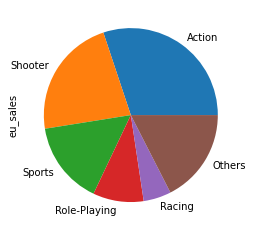

In [65]:
top_eu_genres.plot.pie()

#### И повторим для Японии:

In [66]:
top_jp_genres = games_in_period.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False).head(5)
top_jp_genres

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

In [67]:
top_jp_genres.loc['Others'] = games_in_period['jp_sales'].sum() - sum(top_jp_genres)
top_jp_genres

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Others          25.79
Name: jp_sales, dtype: float64

<AxesSubplot:ylabel='jp_sales'>

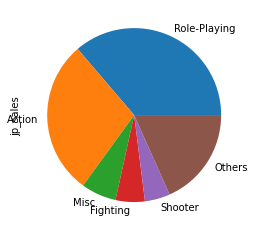

In [68]:
top_jp_genres.plot.pie()

Если посмотреть на доли продаж по конкретным жанрам игр, то видно, что во всех трех регионах популярным является жанр Action, Shooter и Role-playing, в Северной Америке и Европе также популярны жанры Sports, в Северной Америке и Японии в топ входит жанр Misc, жанр Racing входит в топ только в Европе, а жанр Fighting входит в топ только в Японии.

### 3.3 Теперь посмотрим влияет ли рейтинг ESRB на продажи в каждом отдельном регионе.

Все рейтиги, которые использованы в нашем датасете:
- Mature (M)
- Adults Only (AO)
- Everyone (E)
- Everyone 10+ (E10+)
- Early Childhood (EC)
- Rating Pending (RP)
- Teen (T)

In [69]:
esrb_in_na = games_in_period.groupby(['rating'])['na_sales'].agg([sum, lambda x: sum(x)/len(x)])
esrb_in_na.columns= ['total_sum', 'sum per game']
esrb_in_na

,total_sum,sum per game
rating,,
E,79.05,0.261755
E10+,54.24,0.215238
M,165.21,0.447724
T,49.79,0.149520


Самыми продаваемыми в Северной Америке являются игры в категории Mature (M), замем Everyone (E), и затем Everyone 10+ (E10+) и Teen (T).

In [70]:
esrb_in_eu = games_in_period.groupby(['rating'])['eu_sales'].agg([sum, lambda x: sum(x)/len(x)])
esrb_in_eu.columns= ['total_sum', 'sum per game']
esrb_in_eu

,total_sum,sum per game
rating,,
E,83.36,0.276026
E10+,42.69,0.169405
M,145.32,0.393821
T,41.95,0.125976


В Европе точно такая же картина: самыми продаваемыми являются игры в категории Mature (M), замем Everyone (E), и затем примерно одинакого продаются игры в категории Everyone 10+ (E10+) и Teen (T).

In [71]:
esrb_in_jp = games_in_period.groupby(['rating'])['jp_sales'].agg([sum, lambda x: sum(x)/len(x)])
esrb_in_jp.columns= ['total_sum', 'sum per game']
esrb_in_jp

,total_sum,sum per game
rating,,
E,15.14,0.050132
E10+,5.89,0.023373
M,14.11,0.038238
T,20.59,0.061832


В Японии цифры совсем другие и соотношение тоже отличается: самыми продаваемыми являются игры в категории Teen (T), затем Everyone (E) и затем Mature (M) и Everyone 10+ (E10+).
То есть самые продаваемые категории такие же, но распределение другое.

### Вывод

В этом шаге для пользователя каждого региона (NA, EU, JP) были определены:
- Самые популярные платформы (топ-5). Если посмотреть на доли продаж по конкретным платформам, то видно, что во всех трех странах среди лидеров выделяюется PS3 и PS4 и 3DS, также в Северной Америке и Европе на лидирующих местах XOne и X360, а в Японии популярными также являются PSV и WiiU, которых нет в топе Северной Америки и Европы.
- Если посмотреть на доли продаж по конкретным жанрам игр, то видно, что во всех трех регионах популярным является жанр Action, Shooter и Role-playing, в Северной Америке и Европе также популярны жанры Sports, в Северной Америке и Японии в топ входит жанр Misc, жанр Racing входит в топ только в Европе, а жанр Fighting входит в топ только в Японии.
- Также было выяснено, что рейтинг ESRB влияет на продажи в отдельном регионе.
Было выяснено, что самыми продаваемыми в Северной Америке и в Европе являются игры в категории Mature (M), замем Everyone (E), и затем примерно одинакого продаются игры в категории Everyone 10+ (E10+) и Teen (T). В Японии самыми продаваемыми категориями являются те же самые, но приоритет немного другой: самыми продаваемыми являются игры в категории Teen (T), затем Everyone (E) и затем Mature (M) и Everyone 10+ (E10+).

## Шаг 4. Проверка гипотез <a class="anchor" id="sixth-bullet"></a>

#### Проверим следущие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Если посмотреть на разброс прибыли с игр в актуальном для нас периоде, то у Xbox разброс прибыли находится в пределах 0.75 млн, а у PC в пределах 0.35 млн, их медианные значения тоже различаются - 0.15 и 0.05 млн соответственно.

Как мы выяснили ранее - связь между рейтингами пользователей и прибыльныстью игр есть, но не очень сильная (корреляция около 0.1).

Поэтому было бы интересно проверить одинаковые ли у этих двух платформ пользовательские рейтинги или нет.

#### Пусть нашей нулевой гипотезой будет:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

#### Тогда альтернативная гипотеза будет звучать так:

Средние пользовательские рейтинги платформ Xbox One и PC различаются.


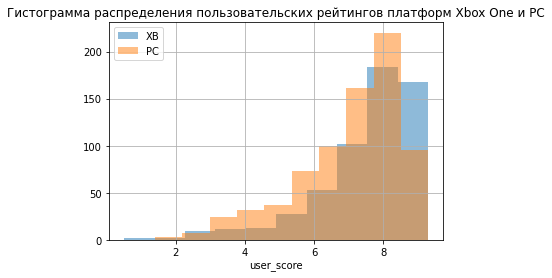

In [72]:
two_platforms = ['XB', 'PC']

for platform in two_platforms:
    games.loc[games['platform'] == platform]['user_score'].hist(bins=10, alpha = 0.5, label=platform)
plt.xlabel('user_score')
plt.title('Гистограмма распределения пользовательских рейтингов платформ Xbox One и PC')
plt.legend() 

In [73]:
(games.loc[games['platform']=='XB', 'user_score']).mean()

7.525043782837127

In [74]:
(games.loc[games['platform']=='PC', 'user_score']).mean()

7.072606382978724

In [75]:
data1 = games.loc[games['platform']=='XB', 'user_score'].dropna()
data2 = games.loc[games['platform']=='PC', 'user_score'].dropna()
alpha = 0.05

results = st.ttest_ind(
    data1,
    data2,
    equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-value: 5.4825758651208154e-08
Отвергаем нулевую гипотезу


Вывод: мы отвергаем нулевую гипотезу, поэтому можем сказать, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

#### Теперь посмотрим различаются ли средние пользовательские рейтинги у жанров Action и Sports.

#### Нулевой гипотезой будет:

Средние пользовательские рейтинги жанров Action и Sports одинаковые.

#### А альтернативной гипотезой будет:

Средние пользовательские рейтинги жанров Action и Sports разные.

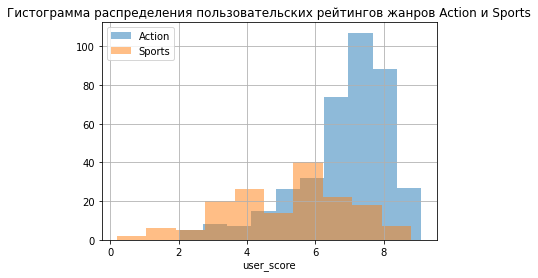

In [76]:
two_genres = ['Action', 'Sports']

for genre in two_genres:
    games_in_period.loc[games_in_period['genre'] == genre]['user_score'].hist(bins=10,
                                                                                    alpha = 0.5, label=genre)
plt.xlabel('user_score')
plt.title('Гистограмма распределения пользовательских рейтингов жанров Action и Sports')
plt.legend() 

In [77]:
(games_in_period.loc[games_in_period['genre']=='Action', 'user_score']).mean()

6.837532133676093

In [78]:
(games_in_period.loc[games_in_period['genre']=='Sports', 'user_score']).mean()

5.238124999999999

In [79]:
data3 = games_in_period.loc[games_in_period['genre']=='Action', 'user_score'].dropna()
data4 = games_in_period.loc[games_in_period['genre']=='Sports', 'user_score'].dropna()
alpha = 0.05

results = st.ttest_ind(
    data3,
    data4,
    equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-value: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [80]:
data3 = games.loc[games['genre']=='Action', 'user_score'].dropna()
data4 = games.loc[games['genre']=='Sports', 'user_score'].dropna()
alpha = 0.05

results = st.ttest_ind(
    data3,
    data4,
    equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-value: 0.07370217419278534
Не удалось отвергнуть нулевую гипотезу


#### Вывод для актуального периода:

Мы отвергаем нулевую гипотезу и можем подтвердить, что средние пользовательские рейтинги у жанров Action и Sports различаются.

#### Вывод для всей выборки:

Мы не можем отвергнуть нулевую гипотезу и сказать что средние пользовательские рейтинги у жанров Action и Sports не одинаковые.

### Вывод

В этом шаге мы проверили две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (и отвергли ее (для всей выборки) - то есть рейтинги разные).
- Средние пользовательские рейтинги жанров Action и Sports разные (и отвергли ее для актуального периода - то есть рейтинги разные, но не смогли отвергнуть для всей выборки).

## Общий вывод по работе <a class="anchor" id="seventh-bullet"></a>

В этой работе были проведены следующие шаги:

1) В 1 шаге мы ознакомились с данными и подготовили их для дальнейшего анализа:

- Все колонки были приведены к нижнему регистру.

- Была произведена работа с пропусками, от части таких данных было решено избавиться (пропуски в колонках: name, year_of_release), а часть было решено оставить как есть (колонки с пропусками: critic_score, user_score, rating).

- Значения tbd в столбце user_score были заменены на nan.

- В столбцах year_of_release и user_score был заменен тип данных.

2) В шаге 2 было рассмотрено:

- Сколько игр выпускалось в разные годы и были отсечены года, не релевантные для дальнейшего анализа (до 1994 года).
- Как менялись продажи по платформам. Были выбраны платформы с наибольшими суммарными продажами (PS2, X360, PS3, Wii, DS, PS) и построены распределения их прибыльности по годам. Был сделан вывод, что обычно платформам нужно 1-2 года, чтобы набрать популярность и что средний цикл их жизни около 8-10 лет (примерно к середине этого срока - то есть лет через 5 - на рынке появляется что-то другое и начинает отвоевывать у первой платформы популярность).
- Был выделен актуальный период рассмотрения данных, на основе которого можно будет сделать прогноз на 2017 год (это период с 2013 по 2016 год). К 2014-2015 году практически все платформы, которые мы рассматриваем в данном периоде, уже подходят к логическому концу их жизненного цикла, кроме трех платформ - PS3 (в наименьшей степени), PS4 и XOne, и в 2017-2019 годы можно рассчитывать на их потенциальную прибыльность.
- Было построено распределение по глобальным продажам каждой игры и разбивкой по платформам. По графикам видно, что разница (разброс) в продажах игр по каждой платформе сильно зависит от платформы - на некоторых платформах этот разброс огромен, как например на GB (от 0.25 до 2.25 млн), а на некоторых платформах,как например у WS и NES, он совсем небольшой. Также видно, что медиана по продаж на разных платформах тоже довольно сильно разная - от 0.1 до 0.8 млн.
- Для трех популярных платформ были посчитаны корелляции между прибылью и рейтингами пользователей, и между прибылью и рейтингами критиков, также для этих параметров были построены диаграммы рассеяния, и был сделан вывод, что что ависимость между продажами и отзывами критиков есть и довольно сильная (корреляция около 0.4 по трем рассматриваемым платформам и 0.3 по всем остальным). 
- Было рассмотренно общее распределение игр по жанрам. По суммарным продажам резко выделяется жанр Action, за ним идет Shooter, Role-Playing и Sports. Эти 4 жанра сильно выделяются на общем фоне остальных жанров, которые коллеблются между 10-75 мл долларов по суммарным продажам. Самыми не прибыльными являются жанры Puzzle и Strategy.

3) В шаге 3 для пользователя каждого региона (NA, EU, JP) были определены:
- Самые популярные платформы (топ-5). Если посмотреть на доли продаж по конкретным платформам, то видно, что во всех трех странах среди лидеров выделяюется PS3 и PS4 и 3DS, также в Северной Америке и Европе на лидирующих местах XOne и X360, а в Японии популярными также являются PSV и WiiU, которых нет в топе Северной Америки и Европы.
- Если посмотреть на доли продаж по конкретным жанрам игр, то видно, что во всех трех регионах популярным является жанр Action, Shooter и Role-playing, в Северной Америке и Европе также популярны жанры Sports, в Северной Америке и Японии в топ входит жанр Misc, жанр Racing входит в топ только в Европе, а жанр Fighting входит в топ только в Японии.
- Также было выяснено, что рейтинг ESRB влияет на продажи в отдельном регионе.
Было выяснено, что самыми продаваемыми в Северной Америке и в Европе являются игры в категории Mature (M), замем Everyone (E), и затем примерно одинакого продаются игры в категории Everyone 10+ (E10+) и Teen (T). В Японии самыми продаваемыми категориями являются те же самые, но приоритет немного другой: самыми продаваемыми являются игры в категории Teen (T), затем Everyone (E) и затем Mature (M) и Everyone 10+ (E10+).

4) И на 4-ом шаге были проверены две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (и отвергли ее (для всей выборки) - то есть рейтинги разные).
- Средние пользовательские рейтинги жанров Action и Sports разные (и отвергли ее для актуального периода - то есть рейтинги разные, но не смогли отвергнуть для всей выборки).


Ориентируясь на эти данные, можно делать ставки на потенциально популярные продукт и спланировать рекламные кампании на будущее.